In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import KID_S21 as S21
import pandas as pd
import glob 

import matplotlibcolors
plt.style.use('matplotlibrc')

%matplotlib widget

In [2]:
dir = r'Z:\KIDonSun\experiments\Entropy ADR\LT361w2chip5_BF_20241018\S21\Power/'
df = S21.loop_over_S21_files(dir, kid=None, pread=110)
display(df)

c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIPT\KID_S21.py:43: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_results = pd.concat([df_results, new_entry], ignore_index=True)
c:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\NEW_S21_SCRIP

,KID,Power,Temperature,f0,f0_std,Ql,Ql_std,Qc,Qc_std,Qi,Qi_std,Pint,redchisqr
0,100,-110.0,0.100011,5.179690,8.552544e-06,25390.350361,2855.911592,18740.166992,1942.423169,-7.154982e+04,1.460598e+04,-69.605859,0.052816
1,101,-110.0,0.100041,5.189271,9.818192e-08,52363.797845,99.699610,57482.227116,139.968470,5.880686e+05,1.470931e+04,-68.186212,0.000020
2,102,-110.0,0.099973,5.198882,3.453540e-06,43034.959972,2364.606084,41442.122625,4959.481216,-1.119675e+06,2.851600e+06,-68.469491,0.018415
3,103,-110.0,0.099956,5.198866,4.145503e-06,37807.918795,2207.499180,42420.526411,3304.565977,3.477061e+05,2.152187e+05,-69.695604,0.021358
4,104,-110.0,0.100044,5.203578,9.454745e-08,45460.938475,71.013711,48404.262543,112.633683,7.476252e+05,2.665494e+04,-68.667567,0.000017
...,...,...,...,...,...,...,...,...,...,...,...,...,...
371,96,-110.0,0.099969,5.122943,7.603203e-08,49300.333612,68.679039,53562.245484,98.775460,6.195897e+05,1.320551e+04,-68.403089,0.000012
372,97,-110.0,0.100010,5.128594,1.402078e-07,51394.468775,139.263257,57114.272501,190.991698,5.131920e+05,1.555032e+04,-68.320618,0.000040
373,98,-110.0,0.100093,5.171322,8.826405e-08,65425.463133,141.910419,74409.956964,190.563424,5.418564e+05,1.037621e+04,-67.372873,0.000020
374,99,-110.0,0.099991,5.179649,1.709784e-07,45974.709732,132.064966,49656.732515,211.676607,6.200271e+05,3.283504e+04,-68.680900,0.000064


In [4]:
def fit(x, a, b):
    return a*x**(-2)+b 

151
697578.45662967 19923.578384745433


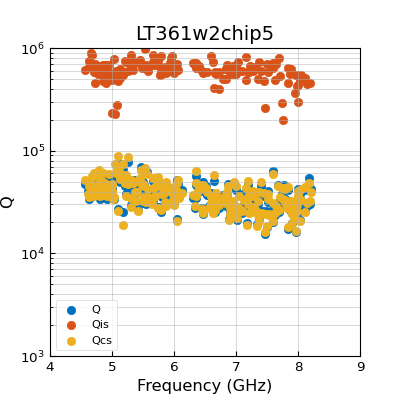

In [8]:
f0s = np.array(df['f0'])
Qs = np.array(df['Ql'])
Qis = np.array(df['Qi'])
Qcs = np.array(df['Qc'])

min_df = 0.002
df0s = f0s[1:] - f0s[:-1]
df_mask = np.zeros(f0s.shape, dtype=bool)
too_close = df0s < min_df
too_close_mask = np.hstack((False, too_close)) + np.hstack((too_close, False))
print(np.sum(too_close_mask))
popt, pcov = curve_fit(fit, f0s[~too_close_mask], Qcs[~too_close_mask])
f0s_fit = np.linspace(f0s[~too_close_mask].min(), f0s[~too_close_mask].max(), 100)

fig, ax = plt.subplots(figsize=(4,4))
ax.set_title('LT361w2chip5')
ax.set_yscale('log')
ax.scatter(f0s[~too_close_mask], Qs[~too_close_mask], label='Q')
ax.scatter(f0s[~too_close_mask], Qis[~too_close_mask], label='Qis')
ax.scatter(f0s[~too_close_mask], Qcs[~too_close_mask], label='Qcs')
# ax.plot(f0s_fit, fit(f0s_fit, *popt), label='fit $y=a/x^2 +b$', c='k', ls='--')
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(1e3, 1e6)
ax.set_ylabel('Q')
ax.legend()
print(*popt)

Text(0, 0.5, 'Length coupler (um)')

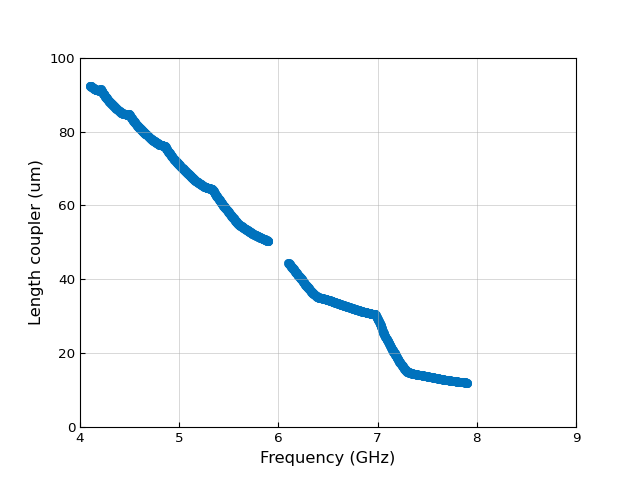

In [56]:
couplers = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_couplers.npy')
f0s_design = np.load(r'C:\Users\wilbertr\ownCloud2\PhD\PhD\PythonProjects\spatial-mapping\Mappings\LT361w2chip9\LT361_4-8GHz_1024px_F0s.npy')*1e-9
fig, ax = plt.subplots()
ax.scatter(f0s_design, couplers)
ax.set_xlim(4,9)
ax.set_xlabel('Frequency (GHz)')    
ax.set_ylim(0, 100)
ax.set_ylabel('Length coupler (um)')